<a href="https://colab.research.google.com/github/CristhianSeverino/Saas_Sales_Pedictive_Analytics/blob/main/Metricas_SaaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================  Importar Librerias   ================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm # Importar el módulo
from datetime import datetime
# Configurar estilo de visualizaciones
sns.set(style="whitegrid")
%matplotlib inline
print("=================================   Librerias  de Python Ejecutandose Con Exito  ========================================")


=================================   Librerias  de Python Ejecutandose Con Exito  ========================================


In [2]:
# ============================   Importar Datos y Crear Data Frame   =========================================
data= pd.read_csv('SaaS-Sales.csv')
print("=================================   Datos Cargados Con Exito  ========================================")
print(data.describe())
print(data.head())
print("\nColumnas",data.columns)

=================================   Datos Cargados Con Exito  ========================================
            Row ID      Date Key  Customer ID         Sales     Quantity  \
count  9994.000000  9.994000e+03  9994.000000   9994.000000  9994.000000   
mean   4997.500000  2.021803e+07  1049.771963    229.858001     3.789574   
std    2885.163629  1.123898e+04    29.719388    623.245101     2.225110   
min       1.000000  2.020010e+07  1001.000000      0.444000     1.000000   
25%    2499.250000  2.021052e+07  1024.000000     17.280000     2.000000   
50%    4997.500000  2.022063e+07  1049.000000     54.490000     3.000000   
75%    7495.750000  2.023052e+07  1076.000000    209.940000     5.000000   
max    9994.000000  2.023123e+07  1101.000000  22638.480000    14.000000   

          Discount       Profit  
count  9994.000000  9994.000000  
mean      0.156203    28.656896  
std       0.206452   234.260108  
min       0.000000 -6599.978000  
25%       0.000000     1.728750  
50%     

In [3]:
print("=================================   Exploracion de nulos y Manejo de duplicados   ========================================")
print (" ==========   Valores Nulos   ============")
print(data.isnull().sum())
print("\nFilas Sin data Faltante ni Nulos:", len(data))

data=data.drop_duplicates(subset=['Row ID'])
print("\nFilas tras eliminar duplicados:", len(data))






=================================   Exploracion de nulos y Manejo de duplicados   ========================================
 ==========   Valores Nulos   ============
Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Filas Sin data Faltante ni Nulos: 9994

Filas tras eliminar duplicados: 9994


In [4]:
#Limpieza De datos Fase 2
#Convertir Transation Date a date time
data['Order Date']= pd.to_datetime(data['Order Date'])
#Verificar si hay fechas invalidas
print("\n====================== Fromato de Fecha Aplicado =======================")
print(data.head())
print("==========================================================================")

#Rellenar Nulos en sales y profit con 0
data['Sales']=data['Sales'].fillna(0)
data['Profit']=data['Profit'].fillna(0)
data['Discount']=data['Discount'].fillna(0)
data['Contact Name'].fillna('Descoocido',inplace=True)
data['Customer'].fillna('Cliente Anónimo',inplace=True)
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce') # 'coerce' convierte valores no numéricos a NaN
data['Sales'] = data['Sales'].fillna(0) # Rellena los NaN resultantes con 0, o el valor que consideres apropiado

#Eliminar filas sin Customer ID u Order Date
data=data.dropna(subset=['Customer ID','Order Date'])
print("==========================   Limpieza de Datos, ¡Exitosa! A Celebarlo Con un CAFE   ====================")
print("\nFilas tras manejar nulos:", len(data))

#Estandarizar Segmet(Convertir  a Mayusculas)
data['Segment']=data['Segment'].str.upper()
print("====================================================================================================")
print("\nValores unicos en Segmet:",data['Segment'].unique())


====================== Fromato de Fecha Aplicado =======================
   Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017  

<ipython-input-4-588501034>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Contact Name'].fillna('Descoocido',inplace=True)
<ipython-input-4-588501034>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

=======================   Exploración Inicial de Datos   ===================================
            Row ID                     Order Date      Date Key  Customer ID  \
count  9994.000000                           9994  9.994000e+03  9994.000000   
mean   4997.500000  2022-05-01 00:07:12.259355648  2.021803e+07  1049.771963   
min       1.000000            2020-01-04 00:00:00  2.020010e+07  1001.000000   
25%    2499.250000            2021-05-23 00:00:00  2.021052e+07  1024.000000   
50%    4997.500000            2022-06-27 00:00:00  2.022063e+07  1049.000000   
75%    7495.750000            2023-05-15 00:00:00  2.023052e+07  1076.000000   
max    9994.000000            2023-12-31 00:00:00  2.023123e+07  1101.000000   
std    2885.163629                            NaN  1.123898e+04    29.719388   

              Sales     Quantity     Discount       Profit  
count   9994.000000  9994.000000  9994.000000  9994.000000  
mean     229.858001     3.789574     0.156203    28.656896  
min

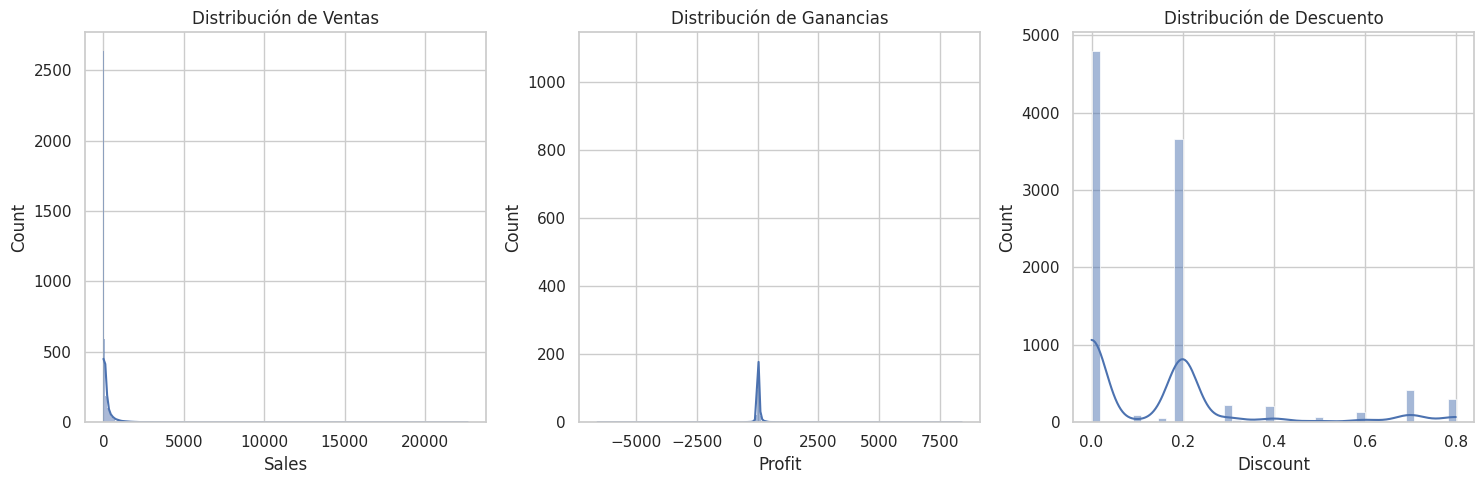

In [5]:
# --- Sección 3: Exploración Inicial de Datos (EDA) ---
print("=======================   Exploración Inicial de Datos   ===================================")
print(data.describe())
# Visualización de distribuciones clave
print("=====================================================================================================")
print("=======================   Visualización de distribuciones clave   ===================================")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Sales'], kde=True)
plt.title('Distribución de Ventas')
plt.subplot(1, 3, 2)
sns.histplot(data['Profit'], kde=True)
plt.title('Distribución de Ganancias')
plt.subplot(1, 3, 3)
sns.histplot(data['Discount'], kde=True)
plt.title('Distribución de Descuento')
plt.tight_layout()
plt.show()

In [6]:
#=================================   Limpieza y Preprocesamiento de Datos   ============================
print("===========================   Limpieza y Peprocesamiento de Datos   ======================================")
# Convertir 'Order Date' a datetime

data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extraer componentes de fecha
data['Year']=data['Order Date'].dt.year
data['Month'] =data['Order Date'].dt.month
data['Month_Year']=data['Order Date'].dt.to_period('M')
data['Quarter']=data['Order Date'].dt.quarter
data['Week']=data['Order Date'].dt.isocalendar().week.astype(int)

# =================================   Estandarizar Columnas de Texto  =========================================

# Estandarizar columnas de texto (ej. capitalizar)
for col in ['Country','City','Region','Subregion','Industry','Segment','Product']:
  data[col]=data[col].astype(str).str.strip().str.title()

print("=================   Preprocesamiento completado. Primeras filas con nuevas columnas   =====================")
print("===========================================================================================================")
print(data.head())

===========================   Limpieza y Peprocesamiento de Datos   ======================================
=================   Preprocesamiento completado. Primeras filas con nuevas columnas   =====================
   Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  ...  \
0        Ireland         Dublin   Emea      Ukir            Chevron  ...   
1        Ireland         Dublin   Emea      Ukir            Chevron  ...   
2  United States  New York City   Amer     Namer        Phillips 66  ...   
3        Germany      Stuttgart   Emea   Eu-West  Royal Dutch Shell  ...

**Metricas**


1. Monthly Recurring Revenue (MRR):
  Month_Year        MRR
0    2020-01  13946.229
1    2020-02   4810.558
2    2020-03  55691.009
3    2020-04  28295.345
4    2020-05  23648.287


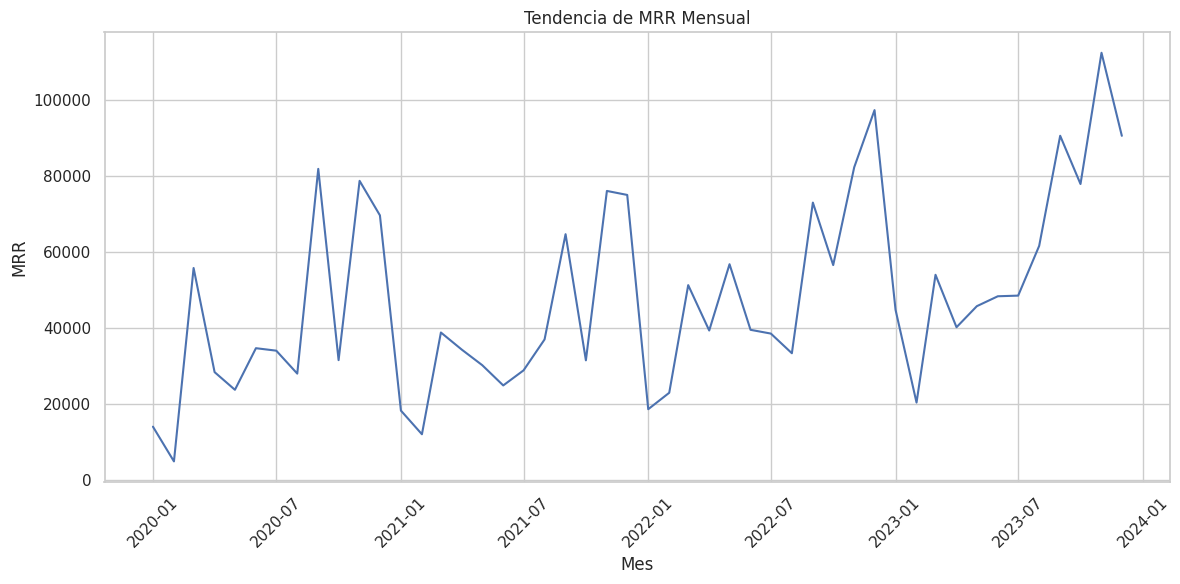

====================   Incorporacion de la metrica a Data Frame Original Con exito   ================
   Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  ...  \
0        Ireland         Dublin   Emea      Ukir            Chevron  ...   
1        Ireland         Dublin   Emea      Ukir            Chevron  ...   
2  United States  New York City   Amer     Namer        Phillips 66  ...   
3        Germany      Stuttgart   Emea   Eu-West  Royal Dutch Shell  ...   
4        Germany      Stuttgart   Emea   Eu-West  Royal Dutch Shell  ...   

   Quantity Discount    Profit  

In [7]:
# 1. Monthly Recurring Revenue (MRR)
# Suposición: Cada venta es recurrente y representa el MRR para ese mes.
# En un escenario real, necesitaríamos un modelo de suscripciones.

mrr_df =data.groupby('Month_Year')['Sales'].sum().reset_index()
mrr_df.columns = ['Month_Year','MRR']
print("\n1. Monthly Recurring Revenue (MRR):")
print(mrr_df.head())

# Creamos una nueva columna temporal con el tipo datetime (Timestamp)
mrr_df['Month_Year_dt'] = mrr_df['Month_Year'].dt.to_timestamp()




plt.figure(figsize=(12, 6))
sns.lineplot(data=mrr_df, x='Month_Year_dt', y='MRR')
plt.title('Tendencia de MRR Mensual')
plt.xlabel('Mes')
plt.ylabel('MRR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preparación para Cohortes y Churn:
# Necesitamos la primera fecha de compra para cada cliente.

customer_first_purchase=data.groupby('Customer ID')['Order Date'].min().reset_index()
customer_first_purchase.columns=['Customer ID','First Purchase Date']
data=data.merge(customer_first_purchase,on= 'Customer ID', how='left')

#Definir la Cohorte de Adquisición por mes
data['Acquisition Month']=data['First Purchase Date'].dt.to_period('M')

#Crear una Tabla de Cliente-mes para sabers i un cliente estuvo activo en un mes dado
customer_monthly_activity=data.groupby(['Customer ID','Month_Year']).agg(
    Revenue=('Sales','sum')
).reset_index()

print("====================   Incorporacion de la metrica a Data Frame Original Con exito   ================")
print(data.head())
print("=====================================================================================================")
print("========================   Se Ha Creado La tabla  Custumer Monthly Activity  =========================")
print(customer_monthly_activity.head())


Pivot de actividad (con meses rellenados):
             2020-01  2020-02  2020-03  2020-04  2020-05  2020-06  2020-07  \
Customer ID                                                                  
1001               0        0        0        1        1        0        0   
1002               0        0        1        1        1        1        1   
1003               0        1        1        1        1        0        1   
1004               1        0        1        0        0        1        1   
1005               0        0        1        1        0        1        1   

             2020-08  2020-09  2020-10  ...  2023-03  2023-04  2023-05  \
Customer ID                             ...                              
1001               1        0        1  ...        1        0        1   
1002               1        1        1  ...        1        1        1   
1003               0        1        1  ...        1        1        1   
1004               1        1        1 

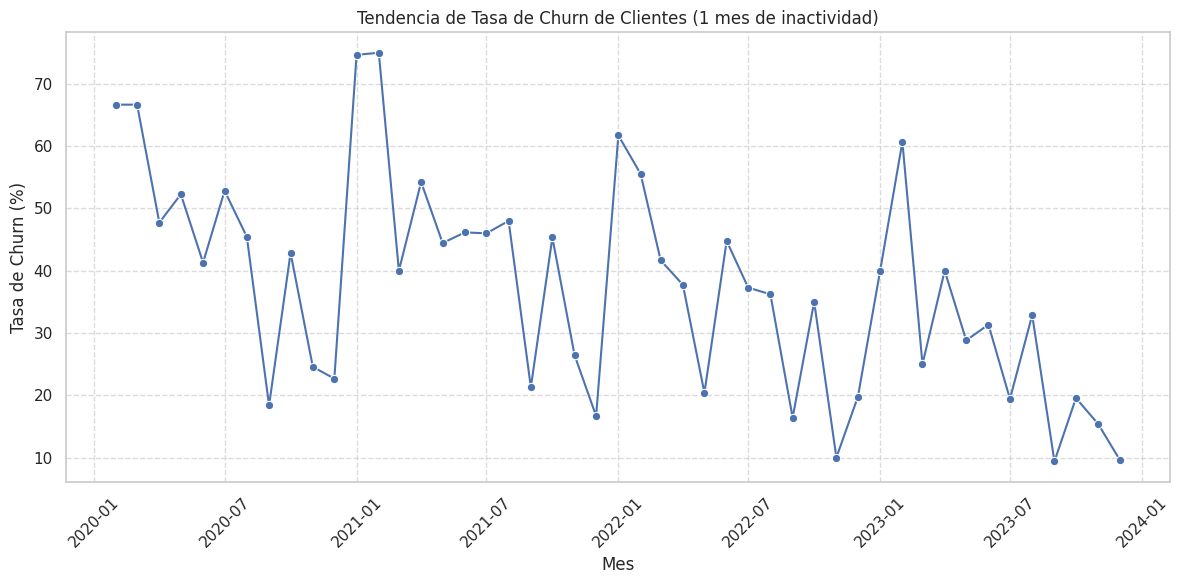

In [8]:
# 2. Customer Churn Rate
# Haremos La suposicion de trabajar con un Modelo de Empresa SaaS por suscroipcion en la cual los clientes

all_months = pd.period_range(start=data['Month_Year'].min(),end=data['Month_Year'].max(),freq='M')
customer_activity_pivot = customer_monthly_activity.pivot_table(
    index='Customer ID', columns='Month_Year',values='Revenue'
).notna().astype(int)


# Obtener todos los meses presentes en tus datos para asegurar la completitud
all_months_in_data = pd.period_range(start=data['Month_Year'].min(), end=data['Month_Year'].max(), freq='M')

# Crear el pivot de actividad (1 si activo, 0 si inactivo)
customer_activity_pivot = customer_monthly_activity.pivot_table(
    index='Customer ID', columns='Month_Year', values='Revenue', aggfunc='sum'
).notna().astype(int)# --- MEJORA 1: Completitud del pivot_activity ---
# Rellenar los meses donde no hubo actividad con 0 para cada cliente.
# Esto asegura que la lógica de churn funcione correctamente para todos los períodos.
customer_activity_pivot = customer_activity_pivot.reindex(columns=all_months_in_data, fill_value=0)
print("\nPivot de actividad (con meses rellenados):")
print(customer_activity_pivot.head())
print("Dimensiones del pivot:", customer_activity_pivot.shape)


# Calcular el churn como la proporción de clientes que estuvieron activos hace dos meses (t-2),
# pero no en el mes anterior (t-1) ni en el mes actual (t).
churn_rates = []
for i in range(1, len(customer_activity_pivot.columns)):
    current_month = customer_activity_pivot.columns[i]
    previous_month = customer_activity_pivot.columns[i-1]

    # Clientes activos en el mes anterior (estos son los "elegibles para churn")
    active_prev_month = customer_activity_pivot[customer_activity_pivot[previous_month] == 1]

    # Clientes que churnearon: activos el mes anterior pero inactivos el mes actual
    churned_this_month = active_prev_month[active_prev_month[current_month] == 0]

    num_churned = len(churned_this_month)
    num_active_prev = len(active_prev_month)

    if num_active_prev > 0:
        churn_rate = (num_churned / num_active_prev) * 100
    else:
        churn_rate = 0 # No hay clientes para churnear si no hubo activos el mes anterior

    churn_rates.append({'Month': current_month, 'Churn Rate (%)': churn_rate})

churn_df = pd.DataFrame(churn_rates)
print("\n--- Tasa de Churn Mensual (1 mes de inactividad) ---")
print(churn_df)

# Convertir la columna 'Month' a datetime (Timestamp) para la visualización
# Aseguramos que el DataFrame no esté vacío antes de intentar la conversión y el plot.
if not churn_df.empty:
    churn_df['Month'] = churn_df['Month'].dt.to_timestamp()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=churn_df, x='Month', y='Churn Rate (%)', marker='o') # Añadido marker para claridad
    plt.title('Tendencia de Tasa de Churn de Clientes (1 mes de inactividad)')
    plt.xlabel('Mes')
    plt.ylabel('Tasa de Churn (%)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame de Churn está vacío. No se detectó churn bajo los criterios definidos para este período.")

In [9]:
# 3. Customer Lifetime Value (LTV)
# LTV = ARPU * Margen Bruto * (1 / Churn Rate) -- para modelos recurrentes
# O simplemente el ingreso total por cliente / número de clientes
# Calcularemos el ingreso total por cliente y el LTV promedio.
customer_revenue = data.groupby('Customer ID')['Sales'].sum().reset_index()
customer_revenue.columns = ['Customer ID', 'Historical_LTV']
ltv_mean = customer_revenue['Historical_LTV'].mean()
print(f"\n==============   Customer Lifetime Value (LTV) promedio: ${ltv_mean:.2f}   ======================")
print("=====================================================================================================")
print("=================================   Customer Revenue  ============================================")
print(customer_revenue.head())
print("=====================================================================================================")
# 1. Calcular el ingreso mensual por cliente
customer_monthly_revenue = data.groupby(['Customer ID', 'Month_Year'])['Sales'].sum().reset_index()
customer_monthly_revenue.columns = ['Customer ID', 'Month_Year', 'Monthly_Revenue']
print("\nIngreso Mensual por Cliente (head):")
print(customer_monthly_revenue.head())

# 2. Calcular ARPU (Average Revenue Per User) por cliente
# Esto es el promedio de sus ingresos mensuales durante los meses que estuvieron activos
customer_arpu = customer_monthly_revenue.groupby('Customer ID')['Monthly_Revenue'].mean().reset_index()
customer_arpu.columns = ['Customer ID', 'ARPU']
print("\nARPU por Cliente (head):")
print(customer_arpu.head())



==============   Customer Lifetime Value (LTV) promedio: $23204.05   ======================
=================================   Customer Revenue  ============================================
   Customer ID  Historical_LTV
0         1001      12617.1140
1         1002      27278.5930
2         1003      39941.6400
3         1004      23189.2165
4         1005      33514.9210

Ingreso Mensual por Cliente (head):
   Customer ID Month_Year  Monthly_Revenue
0         1001    2020-04          552.472
1         1001    2020-05          287.456
2         1001    2020-08          163.620
3         1001    2020-10           49.408
4         1001    2020-12          368.220

ARPU por Cliente (head):
   Customer ID         ARPU
0         1001   525.713083
1         1002   681.964825
2         1003  1248.176250
3         1004   644.144903
4         1005   957.569171


In [10]:
# 3. Obtener la Tasa de Churn Global (del script anterior, 1 mes de inactividad)
# Necesitamos la tasa de churn promedio como una proporción (ej. 0.05 para 5%).

all_months_for_churn_calc = pd.period_range(start=customer_monthly_activity['Month_Year'].min(),
                                            end=customer_monthly_activity['Month_Year'].max(),
                                            freq='M')

customer_activity_pivot = customer_monthly_activity.pivot_table(
    index='Customer ID', columns='Month_Year', values='Revenue', aggfunc='sum'
).notna().astype(int)

# Asegúrate de reindexar para tener los 0s explícitos para la inactividad
customer_activity_pivot = customer_activity_pivot.reindex(columns=all_months_for_churn_calc, fill_value=0)

churn_rates_proportions = [] # Guardaremos las tasas como proporciones
for i in range(1, len(customer_activity_pivot.columns)):
    current_month = customer_activity_pivot.columns[i]
    previous_month = customer_activity_pivot.columns[i-1]

    active_prev_month = customer_activity_pivot[customer_activity_pivot[previous_month] == 1]
    churned_this_month = active_prev_month[active_prev_month[current_month] == 0]

    num_churned = len(churned_this_month)
    num_active_prev = len(active_prev_month)

    if num_active_prev > 0:
        churn_rate_prop = (num_churned / num_active_prev)
    else:
        churn_rate_prop = 0
    churn_rates_proportions.append(churn_rate_prop)

# Calculamos la tasa de churn mensual promedio del período
# Excluimos los 0s si son de meses donde no había clientes activos para churnear
average_monthly_churn_rate = np.mean([rate for rate in churn_rates_proportions if rate > 0])

# Manejo de casos extremos: si la tasa de churn es 0 (lo cual es raro en la realidad)
if average_monthly_churn_rate == 0:
    print("\nAdvertencia: La tasa de churn promedio es 0. Para evitar un LTV infinito, se usará un valor mínimo de churn.")
    # Usamos un valor muy pequeño para que el LTV sea calculable, no infinito.
    average_monthly_churn_rate = 0.0001 # Equivalente a 0.01% de churn

print(f"\nTasa de Churn Mensual Promedio (como proporción): {average_monthly_churn_rate:.4f}")


Tasa de Churn Mensual Promedio (como proporción): 0.3762



=============================== LTV Predictivo por Cliente ====================================
   Customer ID         ARPU  Predictive_LTV
0         1001   525.713083     1048.068181
1         1002   681.964825     1359.573608
2         1003  1248.176250     2488.379789
3         1004   644.144903     1284.175338
4         1005   957.569171     1909.021881

==================== LTVs Finales (Histórico y Predictivo por Cliente) ======================
   Customer ID  Historical_LTV         ARPU  Predictive_LTV
0         1001      12617.1140   525.713083     1048.068181
1         1002      27278.5930   681.964825     1359.573608
2         1003      39941.6400  1248.176250     2488.379789
3         1004      23189.2165   644.144903     1284.175338
4         1005      33514.9210   957.569171     1909.021881

LTV Predictivo Promedio General: $1592.25


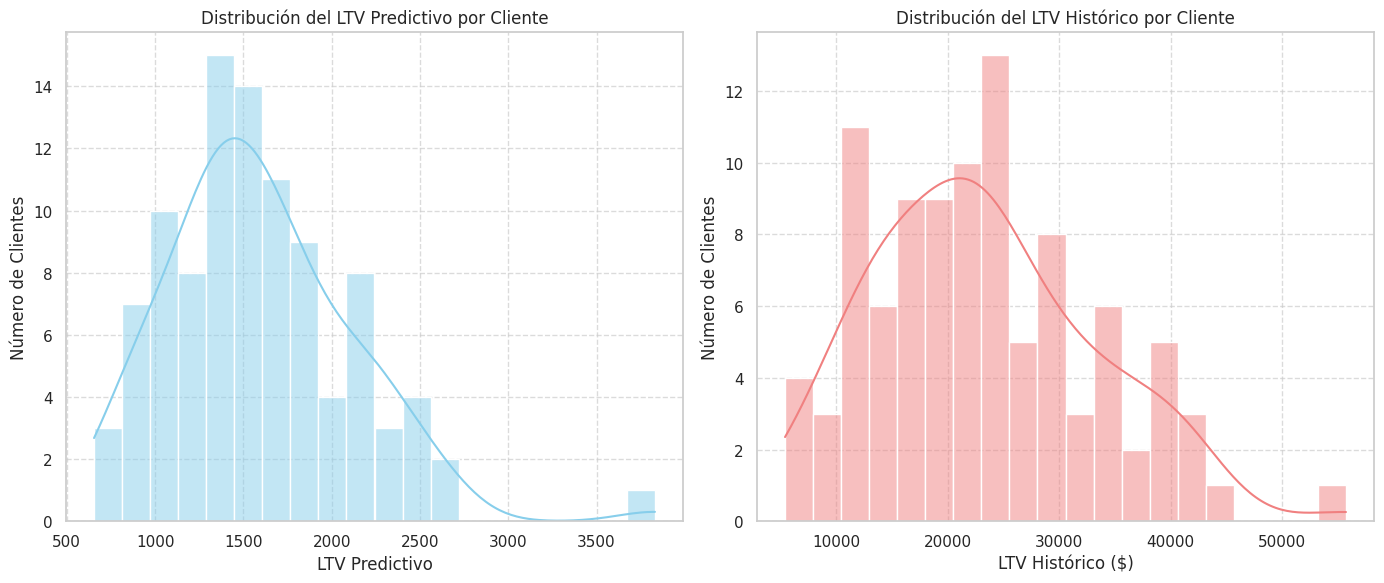

In [11]:
# 4. Definir Margen Bruto
# Este es un valor CLAVE que debes obtener de las finanzas de tu negocio SaaS.
# Por ejemplo, si tus costos directos de entregar el servicio son el 30% de tus ingresos, tu margen bruto es 70% (0.70).
GROSS_MARGIN = 0.75 # Ejemplo: 75% de margen bruto para una empresa SaaS

# 5. Aplicar la Fórmula de LTV Predictivo por Cliente
# LTV = ARPU * Margen Bruto * (1 / Tasa de Churn Mensual)
predictive_ltv_per_customer = customer_arpu.copy()
predictive_ltv_per_customer['Predictive_LTV'] = predictive_ltv_per_customer['ARPU'] * GROSS_MARGIN * (1 / average_monthly_churn_rate)

# Si algún cliente no tuvo ARPU (ej. si nunca tuvo ingresos), su LTV predictivo podría ser NaN.
# Rellenamos esos con 0.
predictive_ltv_per_customer['Predictive_LTV'] = predictive_ltv_per_customer['Predictive_LTV'].fillna(0)


print("\n=====================================================================================================")
print("=============================== LTV Predictivo por Cliente ====================================")
print(predictive_ltv_per_customer.head())

# --- Unir LTV Histórico y Predictivo en un solo DataFrame ---
final_ltv_df = pd.merge(customer_revenue, predictive_ltv_per_customer, on='Customer ID', how='left')

# Si hay clientes en 'predictive_ltv_per_customer' que no estaban en 'customer_revenue' (raro, pero posible si tu 'data' es peculiar),
# los rellenamos con 0 para los LTVs históricos.
final_ltv_df['Historical_LTV'] = final_ltv_df['Historical_LTV'].fillna(0)


print("\n=====================================================================================================")
print("==================== LTVs Finales (Histórico y Predictivo por Cliente) ======================")
print(final_ltv_df.head())
print(f"\nLTV Predictivo Promedio General: ${final_ltv_df['Predictive_LTV'].mean():.2f}")
# \-\-\- Visualización de las Distribuciones de LTV \-\-\-
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.histplot(final_ltv_df['Predictive_LTV'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del LTV Predictivo por Cliente')
plt.xlabel('LTV Predictivo')
plt.ylabel('Número de Clientes')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(final_ltv_df['Historical_LTV'], bins=20, kde=True, color='lightcoral')
plt.title('Distribución del LTV Histórico por Cliente')
plt.xlabel('LTV Histórico ($)')
plt.ylabel('Número de Clientes')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


6. Cohorte de Retención (% de clientes que permanecen):
Months Since Acquisition     0      1       2      3       4       5       6   \
Acquisition Month                                                               
2020-01                   100.0  66.67   40.74  51.85     NaN   85.19     NaN   
2020-02                   100.0  44.44   44.44  33.33   38.89   44.44     NaN   
2020-03                   100.0  53.85   42.31  57.69   57.69   57.69   84.62   
2020-04                   100.0    NaN   72.73    NaN   45.45   63.64   45.45   
2020-05                   100.0    NaN   16.67  33.33   66.67   50.00   83.33   
2020-06                   100.0    NaN   40.00  60.00   80.00  100.00   80.00   
2020-07                   100.0  50.00   50.00  50.00  100.00   50.00     NaN   
2020-08                   100.0  66.67   33.33  33.33   66.67   33.33   33.33   
2020-09                   100.0    NaN  100.00    NaN     NaN  100.00  100.00   

Months Since Acquisition      7      8       9   ..

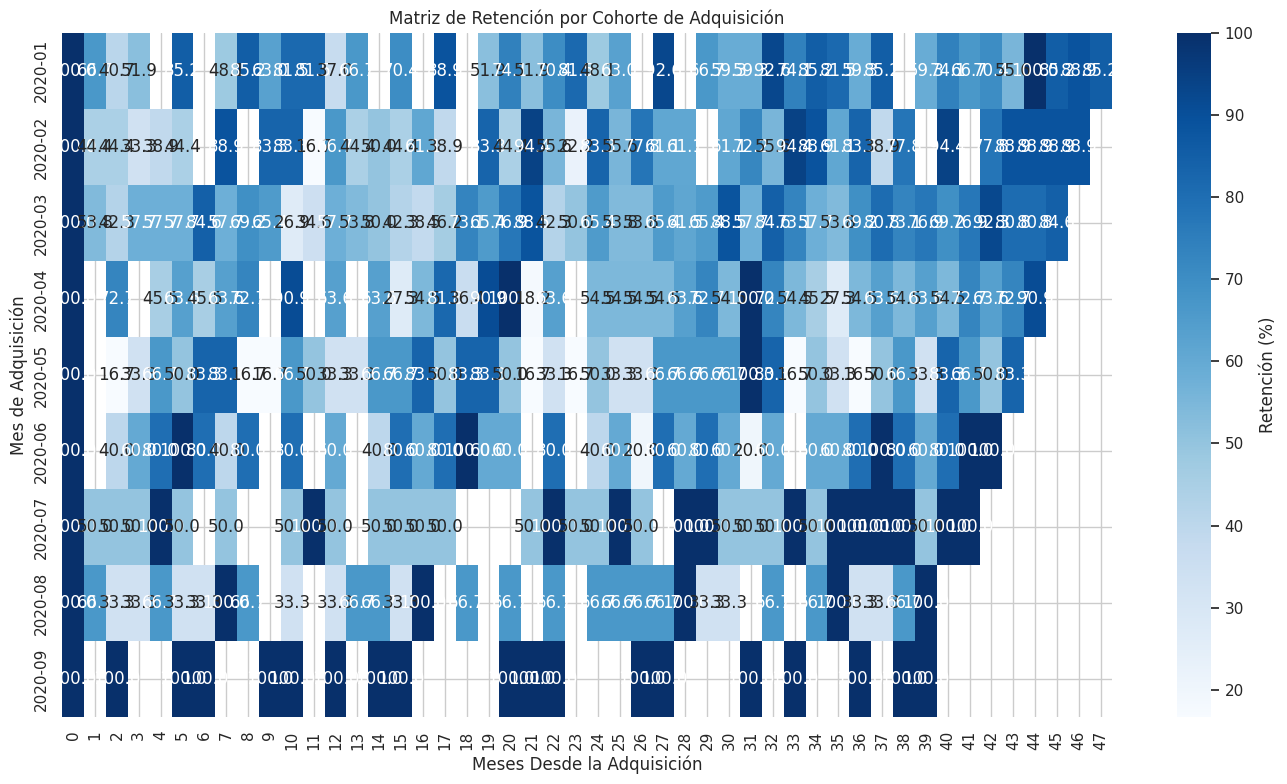

In [12]:
#5. Cohorte de Retención
# Calculamos el mes de adquisición y luego la actividad en meses subsiguientes.
# Para cada cliente, el número de meses desde la adquisición.
data['Months Since Acquisition'] = (data['Month_Year'].apply(lambda x: x.to_timestamp()) -
                                 data['Acquisition Month'].apply(lambda x: x.to_timestamp())).dt.days / 30.4
data['Months Since Acquisition'] = data['Months Since Acquisition'].astype(int)

# Crear una tabla de cohorte de retención
cohort_counts = data.groupby(['Acquisition Month', 'Months Since Acquisition']).agg(
    Customers=('Customer ID', 'nunique')
).reset_index()

# Pivotar para el formato de cohorte
cohort_pivot = cohort_counts.pivot_table(
    index='Acquisition Month',
    columns='Months Since Acquisition',
    values='Customers'
)

# Calcular la retención porcentual
cohort_sizes = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

print("\n6. Cohorte de Retención (% de clientes que permanecen):")
print(retention_matrix.round(2))

plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="Blues",
            cbar_kws={'label': 'Retención (%)'})
plt.title('Matriz de Retención por Cohorte de Adquisición')
plt.xlabel('Meses Desde la Adquisición')
plt.ylabel('Mes de Adquisición')
plt.tight_layout()
plt.show()


7. Average Revenue Per User (ARPU) Mensual:
  Month_Year  TotalRevenue  UniqueCustomers         ARPU
0    2020-01     13946.229               27   516.527000
1    2020-02      4810.558               27   178.168815
2    2020-03     55691.009               44  1265.704750
3    2020-04     28295.345               44   643.076023
4    2020-05     23648.287               46   514.093196

Tipos de datos de arpu_monthly después del cálculo:
Month_Year         period[M]
TotalRevenue         float64
UniqueCustomers        int64
ARPU                 float64
dtype: object


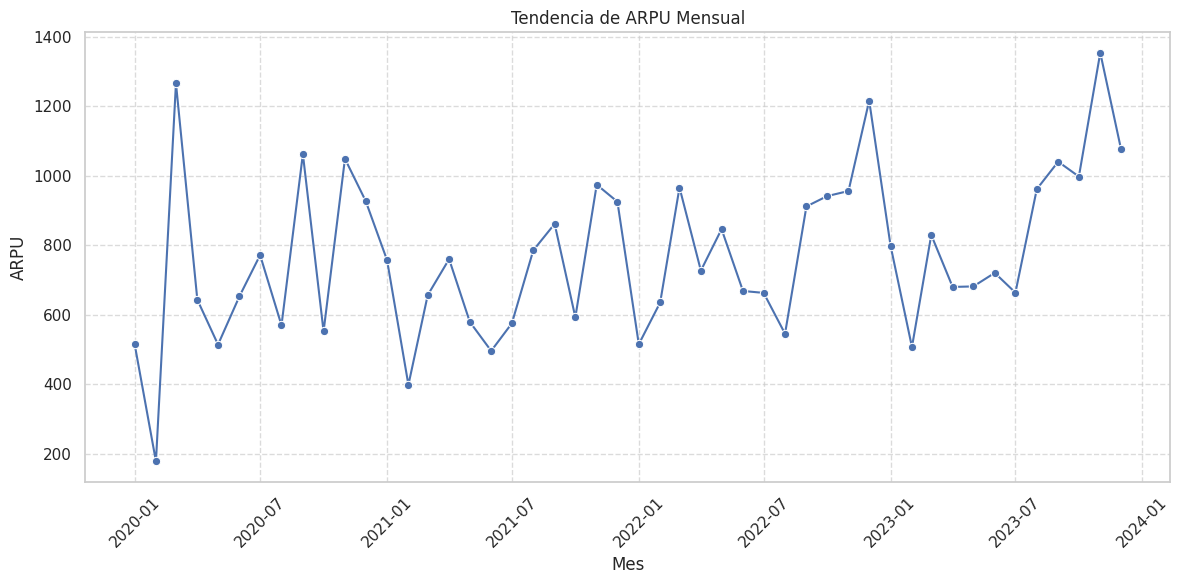

In [13]:
#6.Average Revenue Per User (ARPU)
# Calculamos ARPU mensual
arpu_monthly = data.groupby('Month_Year').agg(
    TotalRevenue=('Sales', 'sum'),
    UniqueCustomers=('Customer ID', 'nunique')
).reset_index()

# Manejar el caso de UniqueCustomers = 0 para evitar división por cero
arpu_monthly['ARPU'] = arpu_monthly.apply(
    lambda row: row['TotalRevenue'] / row['UniqueCustomers'] if row['UniqueCustomers'] > 0 else 0,
    axis=1
)

print("\n7. Average Revenue Per User (ARPU) Mensual:")
print(arpu_monthly.head())
print("\nTipos de datos de arpu_monthly después del cálculo:")
print(arpu_monthly.dtypes) # Verifica los tipos de datos aquí


plt.figure(figsize=(12, 6))

# Antes de graficar, convierte 'Month_Year' a Timestamp si es PeriodDtype
# seaborn.lineplot puede manejar PeriodDtype en versiones recientes, pero Timestamp es más seguro.
arpu_monthly['Month_Year_TS'] = arpu_monthly['Month_Year'].dt.to_timestamp()

sns.lineplot(data=arpu_monthly, x='Month_Year_TS', y='ARPU', marker='o') # Usa la nueva columna Timestamp
plt.title('Tendencia de ARPU Mensual')
plt.xlabel('Mes')
plt.ylabel('ARPU')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


8. Customer Base Growth (Clientes Activos por Mes):
   Month_Year  Active Customers  Growth (%)
0     2020-01                27         NaN
1     2020-02                27    0.000000
2     2020-03                44   62.962963
3     2020-04                44    0.000000
4     2020-05                46    4.545455
5     2020-06                53   15.217391
6     2020-07                44  -16.981132
7     2020-08                49   11.363636
8     2020-09                77   57.142857
9     2020-10                57  -25.974026
10    2020-11                75   31.578947
11    2020-12                75    0.000000
12    2021-01                24  -68.000000
13    2021-02                30   25.000000
14    2021-03                59   96.666667
15    2021-04                45  -23.728814
16    2021-05                52   15.555556
17    2021-06                50   -3.846154
18    2021-07                50    0.000000
19    2021-08                47   -6.000000
20    2021-09          

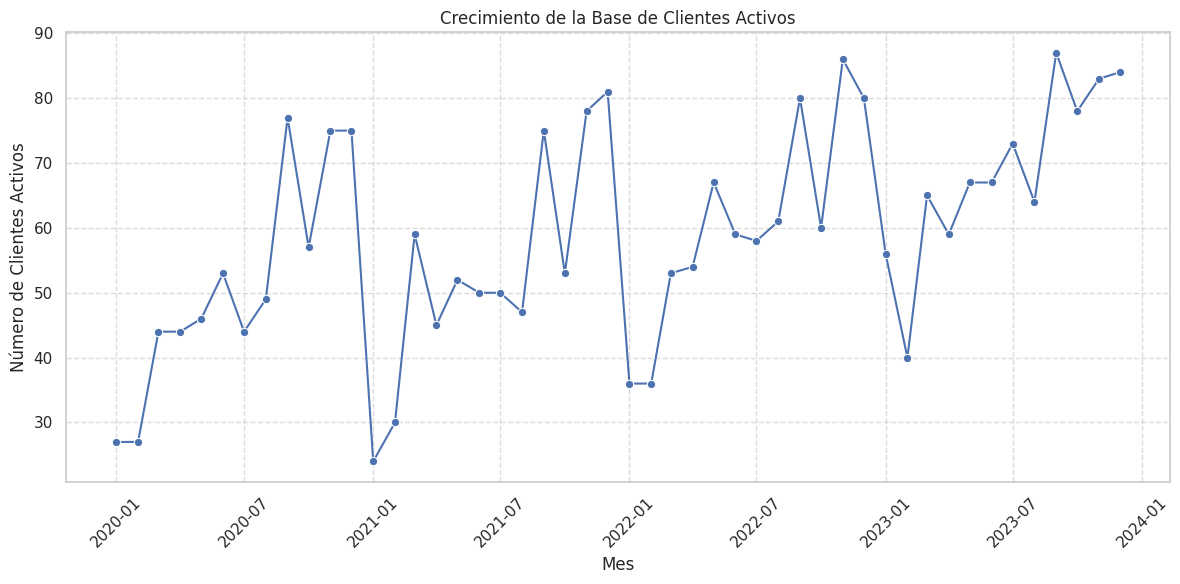

In [15]:
# 7. ====================== Customer Base Growth ====================================================
# Número de clientes únicos por mes
customer_base_growth = data.groupby('Month_Year')['Customer ID'].nunique().reset_index()
customer_base_growth.columns = ['Month_Year', 'Active Customers']

# --- INICIO DE LA SOLUCIÓN: Asegurar que 'Active Customers' sea numérico ---
# Forzar la columna 'Active Customers' a un tipo numérico (ej. float)
customer_base_growth['Active Customers'] = pd.to_numeric(customer_base_growth['Active Customers'], errors='coerce')
# Rellenar cualquier NaN que pueda resultar de la coerción (aunque nunique() debería dar int)
customer_base_growth['Active Customers'] = customer_base_growth['Active Customers'].fillna(0).astype(int) # Volver a int si quieres
# --- FIN DE LA SOLUCIÓN ---

customer_base_growth['Growth (%)'] = customer_base_growth['Active Customers'].pct_change() * 100
print("\n8. Customer Base Growth (Clientes Activos por Mes):")
print(customer_base_growth)

# Opcional: Mostrar los tipos de datos para depuración
print("\nTipos de datos de customer_base_growth antes de graficar:")
print(customer_base_growth.dtypes)

plt.figure(figsize=(12, 6))

# Si 'Month_Year' es PeriodDtype, convertirlo a Timestamp para mayor compatibilidad con seaborn
customer_base_growth['Month_Year_TS'] = customer_base_growth['Month_Year'].dt.to_timestamp()

sns.lineplot(data=customer_base_growth, x='Month_Year_TS', y='Active Customers', marker='o') # Usar la columna Timestamp
plt.title('Crecimiento de la Base de Clientes Activos')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes Activos')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7) # Añadir rejilla para mejor lectura
plt.tight_layout()
plt.show()


9. Tasa de Órdenes por Cliente (proxy de Conversion Rate):
count     99.000000
mean      50.595960
std       17.537667
min       13.000000
25%       38.500000
50%       52.000000
75%       60.000000
max      103.000000
Name: Total Orders, dtype: float64


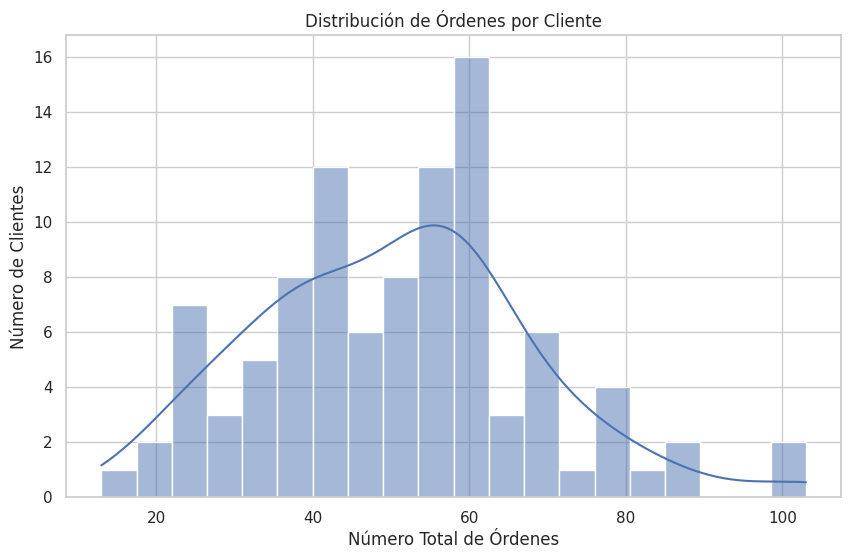

In [16]:
#8.Conversion Rate (Simulado)
# Dado que no tenemos un funnel, simularemos la "conversión" de una interacción a una orden.
# Aquí asumiremos que cada 'Order ID' es una "conversión" de alguna interacción previa.
# Para un caso real, necesitaríamos datos de visitas a la web, registros, etc.
# Podemos calcular la tasa de órdenes por cliente, como una proxy de "qué tan activo es un cliente"
orders_per_customer = data.groupby('Customer ID')['Order ID'].nunique().reset_index()
orders_per_customer.columns = ['Customer ID', 'Total Orders']
print("\n9. Tasa de Órdenes por Cliente (proxy de Conversion Rate):")
print(orders_per_customer['Total Orders'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer['Total Orders'], bins=20, kde=True)
plt.title('Distribución de Órdenes por Cliente')
plt.xlabel('Número Total de Órdenes')
plt.ylabel('Número de Clientes')
plt.show()


10. Gross Profit Margin promedio: 12.03%


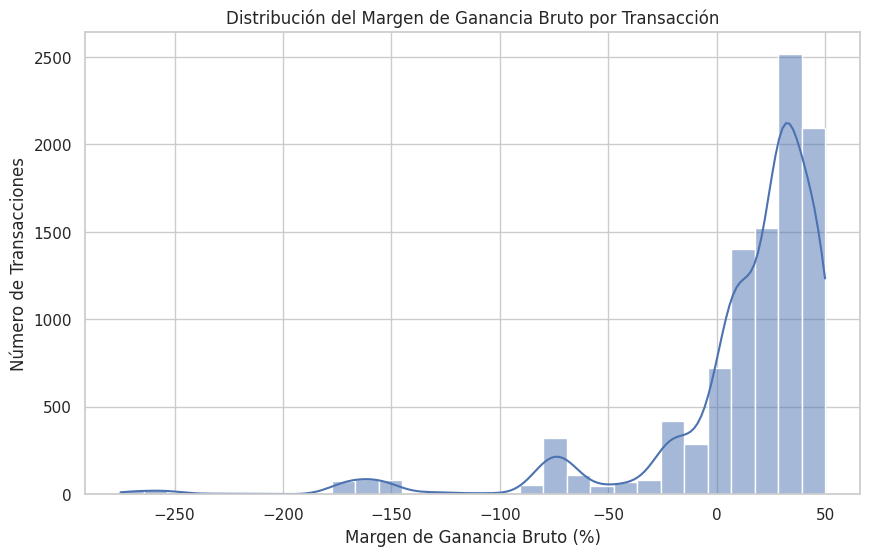

In [19]:
# 9. Gross Profit Margin
# Margen Bruto = (Ganancias / Ventas) * 100
data['Gross Profit Margin'] = (data['Profit'] / data['Sales']) * 100
overall_gpm = data['Gross Profit Margin'].mean()
print(f"\n10. Gross Profit Margin promedio: {overall_gpm:.2f}%")

plt.figure(figsize=(10, 6))
sns.histplot(data['Gross Profit Margin'], bins=30, kde=True)
plt.title('Distribución del Margen de Ganancia Bruto por Transacción')
plt.xlabel('Margen de Ganancia Bruto (%)')
plt.ylabel('Número de Transacciones')
plt.show()


Margen de Ganancia Bruto por Producto:
                       Product  Gross Profit Margin
0   Saas Connector Pack - Gold            42.313976
1                      Support            38.741026
2                      Alchemy            31.719363
3                      Storage            29.917051
4               Chatbot Plugin            25.164573
5                 Data Smasher            21.820968
6                   Financehub            18.703728
7          Saas Connector Pack            13.706635
8               Site Analytics            11.922197
9       Marketing Suite - Gold             8.911348
10             Big Ol Database            -7.202622
11             Marketing Suite           -12.664007
12                     Oneview           -15.686934
13              Contactmatcher           -19.061243


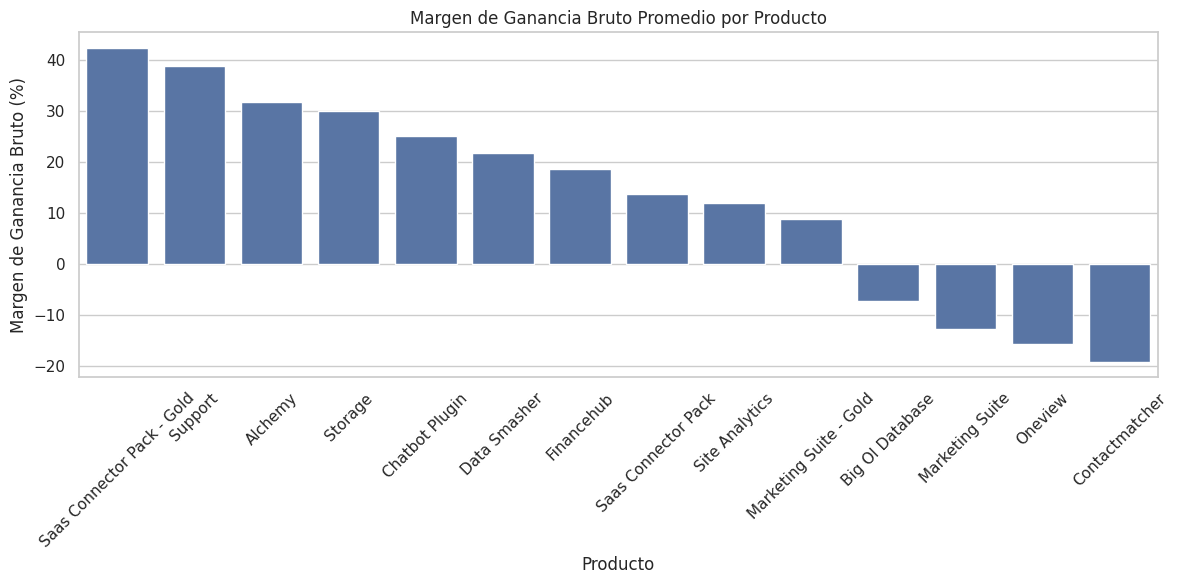

In [20]:
# Análisis de la GPM por Producto o Segmento
gpm_by_product = data.groupby('Product')['Gross Profit Margin'].mean().sort_values(ascending=False).reset_index()
print("\nMargen de Ganancia Bruto por Producto:")
print(gpm_by_product)

plt.figure(figsize=(12, 6))
sns.barplot(data=gpm_by_product, x='Product', y='Gross Profit Margin')
plt.title('Margen de Ganancia Bruto Promedio por Producto')
plt.xlabel('Producto')
plt.ylabel('Margen de Ganancia Bruto (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Red Neuronal Para Predecir Clientes en riesgo de Churn**